# Daub 5/3 integer-to-integer system

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

Импорт пользовательских функций.

In [42]:
from Functions.user_functions import indx_even
from Functions.daub_5_3 import daub_5_3
from Functions.daub_5_3_lift import daub_5_3_lift
from Functions.idaub_5_3_lift import idaub_5_3_lift
from Functions.daub_5_3_lift_2D import daub_5_3_lift_2D
from Functions.idaub_5_3_lift_2D import idaub_5_3_lift_2D

In [43]:
f = np.random.randint(low=-10, high=11, size=8)

## Прямое преобразование

In [44]:
N = len(f)
d = [0] * (N//2)
a = [0] * (N//2)

### Исследование коэффициентов ${d}$

In [45]:
# Функция вычисления коэффициентов флуктуации.
def d_func(k, f, N, int_flag):
    if int_flag:
        return f[indx_even(2*k+1,N)] - (f[indx_even(2*k,N)] + f[indx_even(2*k+2,N)]) //2
    else:
        return f[indx_even(2*k+1,N)] - (f[indx_even(2*k,N)] + f[indx_even(2*k+2,N)]) /2

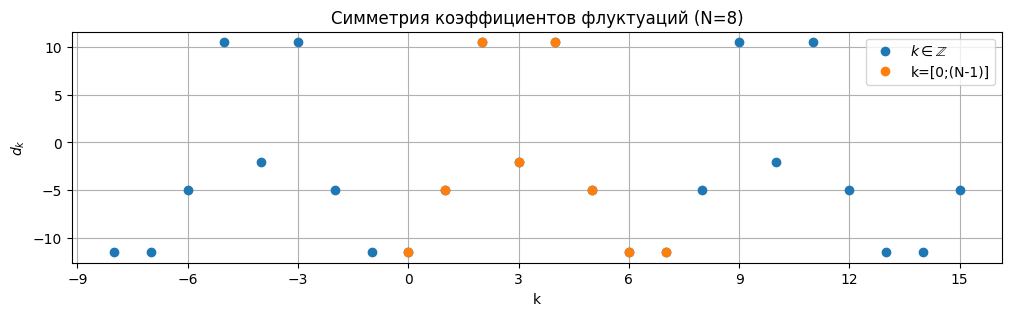

In [46]:
n_gr = []
d_gr = []
for k in range(-N,2*N):
    n_gr.append(k)
    d_gr.append(d_func(k, f, N, int_flag=False))
n_gr_N = []
d_gr_N = []

for k in range(N):
    n_gr_N.append(k)
    d_gr_N.append(d_func(k, f, N, int_flag=False))
    
fig, ax = plt.subplots()
fig.set_figheight(3)
fig.set_figwidth(12)
ax.plot(n_gr, d_gr, 'o')
ax.plot(n_gr_N, d_gr_N, 'o')

# Force integer ticks on x-axis
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.legend(['$k \in \mathbb{Z}$','k=[0;(N-1)]'])
plt.title('Симметрия коэффициентов флуктуаций' + ' (N=' + str(N) + ')')
plt.xlabel('k')
plt.ylabel('$d_k$')
plt.grid(True)
plt.savefig('readme_img/d_symmetry.png', bbox_inches='tight')
plt.show()

Отсюда вывод: ${d_{-1} = d_0}$.

In [47]:
for k in range(N//2):
    d[k] = f[indx_even(2*k+1,N)] - (f[indx_even(2*k,N)] + f[indx_even(2*k+2,N)])/2
    if k == 0:
        a[k] = f[indx_even(2*k,N)] + d[k] /2
    else:
        a[k] = f[indx_even(2*k,N)] + (d[k-1] + d[k]) /4
    #a[k] = -1/8*(f[indx_even(2*k-2,N)] + f[indx_even(2*k+2,N)]) + 1/4*(f[indx_even(2*k-1,N)] + f[indx_even(2*k+1,N)]) + 3/4*f[indx_even(2*k,N)]
print('a', a)
print('d', d)

a [-10.75, 5.875, -6.625, -0.875]
d [-11.5, -5.0, 10.5, -2.0]


## Обратное преобразование

In [48]:
f_rec = [0] * N
# Odd values.
for k in range(N//2):
    if k == 0:
        f_rec[2*k] = a[k] - d[k] /2
    else:
        f_rec[2*k] = a[k] - (d[k-1] + d[k]) /4

# Even values.
for k in range(N//2):
    f_rec[2*k+1] = d[k] + (f[2*k] + f[indx_even(2*k+2,N)])/2
print('Reconstruction:', f_rec)
print('Original:', f)
print('Difference:', f-f_rec)

Reconstruction: [-5.0, -9.0, 10.0, -4.0, -8.0, 5.0, -3.0, -5.0]
Original: [-5 -9 10 -4 -8  5 -3 -5]
Difference: [0. 0. 0. 0. 0. 0. 0. 0.]


## Прямое и обратное преобразование при помощи матричных операций

In [49]:
Mdir = np.matrix(np.concatenate(daub_5_3(N), axis = 0))
tr = np.matrix(f)*(Mdir.T)
Mrev = np.linalg.inv(Mdir).T
print('Wavelet coefficients:', tr.tolist()[0])
print('Reconstruction:', (tr * Mrev).tolist()[0])
print('Original:', f)

Wavelet coefficients: [-10.75, 5.875, -6.625, -0.875, -11.5, -5.0, 10.5, -2.0]
Reconstruction: [-5.0, -9.0, 10.0, -4.0, -8.0, 5.0, -3.0, -5.0]
Original: [-5 -9 10 -4 -8  5 -3 -5]


In [50]:
np.round(Mdir)

matrix([[ 1.,  0., -0.,  0.,  0.,  0.,  0.,  0.],
        [-0.,  0.,  1.,  0., -0.,  0.,  0.,  0.],
        [ 0.,  0., -0.,  0.,  1.,  0., -0.,  0.],
        [ 0.,  0.,  0.,  0., -0.,  0.,  1.,  0.],
        [-0.,  1., -0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0., -0.,  1., -0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0., -0.,  1., -0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0., -1.,  1.]])

## Целочисленные преобразования

Созданы функции lifting-преобразования.

In [51]:
# float-преобразование.
coeff_float = daub_5_3_lift(f, int_flag=False)
print(coeff_float)

# int-преобразование.
coeff_int = daub_5_3_lift(f, int_flag=True)
print(coeff_int)

[-10.75, 5.875, -6.625, -0.875, -11.5, -5.0, 10.5, -2.0]
[-11, 6, -7, -1, -12, -5, 10, -2]


Обратное преобразование, также по lifting-схеме.

In [52]:
# float-преобразование.
f_float = idaub_5_3_lift(coeff_float, int_flag=False)
print(np.array(f_float).dtype)
print(f_float)

# int-преобразование.
f_int = idaub_5_3_lift(coeff_int, int_flag=True)
print(np.array(f_int).dtype)
print(f_int)

float64
[-5.0, -9.0, 10.0, -4.0, -8.0, 5.0, -3.0, -5.0]
int32
[-5, -9, 10, -4, -8, 5, -3, -5]


## 2D-преобразование

Формируем двумерный массив.

In [53]:
g = np.random.randint(low=-10, high=11, size=10*8).reshape(10,8)
print(g)

[[  5   2  -1  -8  -8  -6  -7  -7]
 [ -5   0   8   5 -10  -6  -6  -8]
 [  4   8  -6   6   9  -4   8   9]
 [ -6  -4  -7   0   8   4   7  -3]
 [  6  -8   4  -3   2   5  -6   5]
 [  6  -1  -1  -5  -9   2   6   2]
 [ -8  -4   9  -1  -3  -8  -7  10]
 [  9   0  -8   0   5   0   4   6]
 [  2  10  -9  -2  -6   1   8   2]
 [-10  -2  -4  -2   0   8   2   1]]


### Прямое преобразование

In [54]:
# float-преобразование.
coeff_2D_float = daub_5_3_lift_2D(g, int_flag=False)
print(coeff_2D_float.dtype)
print(coeff_2D_float)

float64
[[ 10.75     -11.        -0.5       -0.625      1.5       -9.5
   -0.5        2.      ]
 [ 13.75      -3.9375     7.5        6.3125     8.5        1.75
  -11.75       7.      ]
 [ -0.25       3.4375     2.8125    -6.25     -12.5       -5.75
    7.        18.      ]
 [-16.75      11.6875    -2.8125    -8.125     -2.5       -4.75
   -2.5       18.      ]
 [  8.125      1.        -7.625      3.0625    11.25       4.75
   -1.25      -6.5     ]
 [  0.375      5.390625  -6.25      -4.578125   1.         4.0625
   -1.0625     0.25    ]
 [ -1.375     -6.625      9.578125   3.640625   1.5       -1.5
   -4.6875    -3.75    ]
 [  0.         1.90625   -8.125      2.28125   -7.25      -2.625
    4.625      5.      ]
 [  6.59375   -4.578125   1.640625   2.109375   1.6875     1.5
   -5.4375     4.875   ]
 [ -3.4375    -2.25      -2.0625     5.03125   10.625      2.375
    6.375     -4.25    ]]


In [55]:
# int-преобразование.
coeff_2D_int = daub_5_3_lift_2D(g, int_flag=True)
print(coeff_2D_int.dtype)
print(coeff_2D_int)

int32
[[ 11 -11  -1  -1   2 -10  -1   2]
 [ 14  -4   7   6   9   1 -12   7]
 [  0   3   2  -6 -12  -6   7  18]
 [-17  12  -3  -8  -3  -5  -2  18]
 [  8   1  -8   3  11   4  -1  -7]
 [  0   5  -6  -5   1   4  -1   0]
 [ -1  -7   9   4   1  -2  -5  -4]
 [  0   2  -8   3  -8  -3   4   5]
 [  7  -5   1   2   1   1  -6   5]
 [ -3  -2  -2   6  11   2   7  -4]]


### Обратное преобразование

In [56]:
g_float = idaub_5_3_lift_2D(coeff_2D_float, int_flag=False)
print(g_float)
print('Difference (sum):', np.sum(g-g_float))

[[  5.   2.  -1.  -8.  -8.  -6.  -7.  -7.]
 [ -5.   0.   8.   5. -10.  -6.  -6.  -8.]
 [  4.   8.  -6.   6.   9.  -4.   8.   9.]
 [ -6.  -4.  -7.   0.   8.   4.   7.  -3.]
 [  6.  -8.   4.  -3.   2.   5.  -6.   5.]
 [  6.  -1.  -1.  -5.  -9.   2.   6.   2.]
 [ -8.  -4.   9.  -1.  -3.  -8.  -7.  10.]
 [  9.   0.  -8.   0.   5.   0.   4.   6.]
 [  2.  10.  -9.  -2.  -6.   1.   8.   2.]
 [-10.  -2.  -4.  -2.   0.   8.   2.   1.]]
Difference (sum): 0.0


In [57]:
g_int = idaub_5_3_lift_2D(coeff_2D_int, int_flag=True)
print(g_int)
print('Difference (sum):', np.sum(g-g_int))

[[  5   2  -1  -8  -8  -6  -7  -7]
 [ -5   0   8   5 -10  -6  -6  -8]
 [  4   8  -6   6   9  -4   8   9]
 [ -6  -4  -7   0   8   4   7  -3]
 [  6  -8   4  -3   2   5  -6   5]
 [  6  -1  -1  -5  -9   2   6   2]
 [ -8  -4   9  -1  -3  -8  -7  10]
 [  9   0  -8   0   5   0   4   6]
 [  2  10  -9  -2  -6   1   8   2]
 [-10  -2  -4  -2   0   8   2   1]]
Difference (sum): 0


In [58]:
for k in range(20):
    print(int(k/4+1/2), (k+2)//4)

0 0
0 0
1 1
1 1
1 1
1 1
2 2
2 2
2 2
2 2
3 3
3 3
3 3
3 3
4 4
4 4
4 4
4 4
5 5
5 5
